# Advertisement Click Prediction - Group 49

### EG/2020/3947 - Gunathilake A.P.B.
### EG/2020/3998 - Jayaweera S.T.

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


Import Dataset

In [2]:
df = pd.read_csv('class/data/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


Check Missing Data

Missing Data Summary:
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


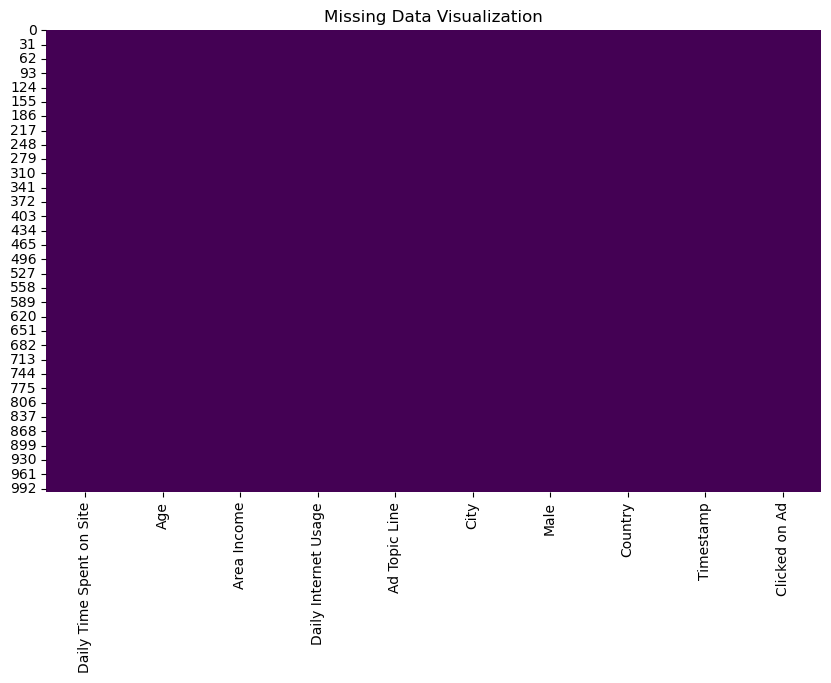

In [3]:
missing_data = df.isnull().sum()

print("Missing Data Summary:")
print(missing_data)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Visualization")
plt.show()

Data Info and Data Description

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Checking for Duplicate Data Rows

In [5]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

df.duplicated().sum()

Empty DataFrame
Columns: [Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Ad Topic Line, City, Male, Country, Timestamp, Clicked on Ad]
Index: []


0

### Pre-Processing:

Checking for the Outliers

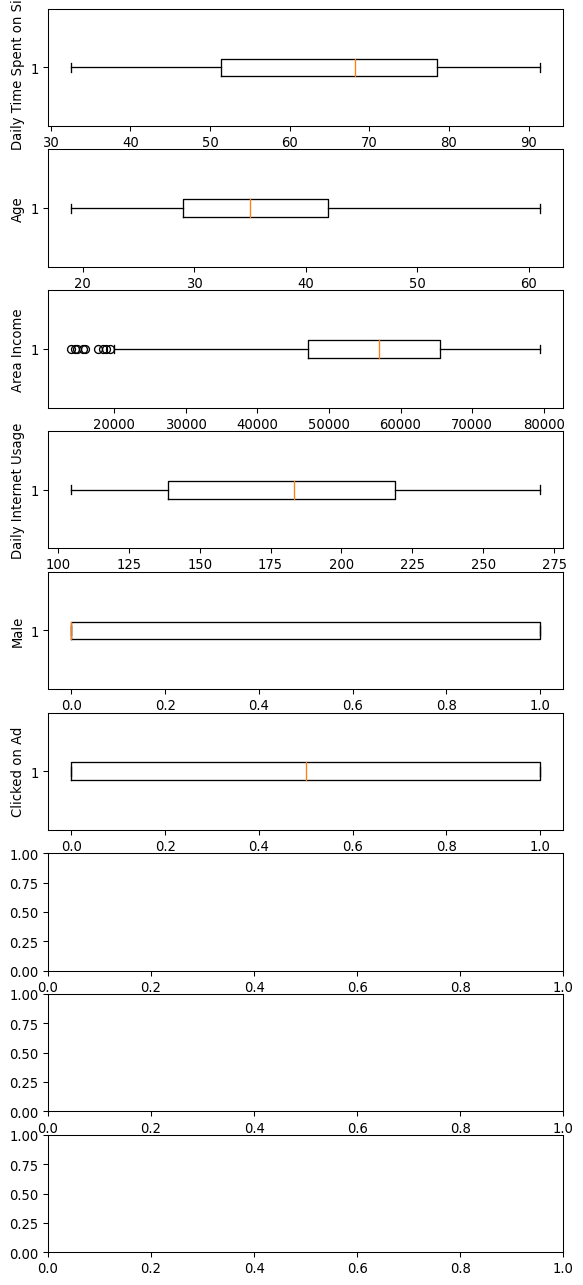

In [6]:
# Box plots
fig, axs = plt.subplots(9, 1, dpi=95, figsize=(7, 17))
i = 0
for col in df.columns:
    # Check if the column contains numeric data
    if np.issubdtype(df[col].dtype, np.number):
        # Convert the column to a numpy array using values
        data_array = df[col].values
        
        # Check for NaN or infinite values and replace them with a placeholder
        data_array = np.where(np.isnan(data_array) | np.isinf(data_array), 0, data_array)
        
        # Plot the boxplot
        axs[i].boxplot(data_array, vert=False)
        axs[i].set_ylabel(col)
        i += 1

plt.show()



In [7]:
# # Dropping outliers
# from scipy.stats import zscore
# z_scores = zscore(df[num_columns])
# df_no_outliers = df[(np.abs(z_scores) < 3).all(axis=1)]

# Identify the quartiles
q1, q3 = np.percentile(df['Area Income'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
no_Outlier_df = df[(df['Area Income'] >= lower_bound) & (df['Area Income'] <= upper_bound)]

df = no_Outlier_df

Split Timestamp

In [8]:
# Split Timestamp column into Year, Month, Day, Hour, Minute, and Second
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Second'] = df['Timestamp'].dt.second

# Drop 'Timestamp' and 'Year' columns
df.drop(['Timestamp', 'Year', 'Second', 'Ad Topic Line'], axis=1, inplace=True)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Clicked on Ad,Month,Day,Hour,Minute
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,0,3,27,0,53
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru,0,4,4,1,39
2,69.47,26,59785.94,236.50,Davidton,0,San Marino,0,3,13,20,35
3,74.15,29,54806.18,245.89,West Terrifurt,1,Italy,0,1,10,2,31
4,68.37,35,73889.99,225.58,South Manuel,0,Iceland,0,6,3,3,36


Check for Non-Numeric Columns

In [9]:
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print("Non-Numeric Columns:", non_numeric_columns)
df.head()

Non-Numeric Columns: Index(['City', 'Country'], dtype='object')


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Clicked on Ad,Month,Day,Hour,Minute
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,0,3,27,0,53
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru,0,4,4,1,39
2,69.47,26,59785.94,236.50,Davidton,0,San Marino,0,3,13,20,35
3,74.15,29,54806.18,245.89,West Terrifurt,1,Italy,0,1,10,2,31
4,68.37,35,73889.99,225.58,South Manuel,0,Iceland,0,6,3,3,36


In [10]:
unique_countries = df['Country'].nunique()
print(f'The number of unique countries in the dataset is: {unique_countries}')
df['Country'].value_counts()

The number of unique countries in the dataset is: 237


Country
France                                                 9
Czech Republic                                         9
Liberia                                                8
South Africa                                           8
Micronesia                                             8
                                                      ..
Montserrat                                             1
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Lesotho                                                1
Name: count, Length: 237, dtype: int64

In [11]:
df['City'].value_counts()

City
Lisamouth             3
Williamsport          3
New Sheila            2
West Amanda           2
Johnstad              2
                     ..
East Yvonnechester    1
Burgessside           1
Hurleyborough         1
Garychester           1
Ronniemouth           1
Name: count, Length: 960, dtype: int64

Use Label Encoding for 'City' and 'Country' columns

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to 'City' and 'Country' columns
df['City'] = label_encoder.fit_transform(df['City'])
df['Country'] = label_encoder.fit_transform(df['Country'])
df.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Clicked on Ad,Month,Day,Hour,Minute
0,68.95,35,61833.90,256.09,952,0,215,0,3,27,0,53
1,80.23,31,68441.85,193.77,895,1,147,0,4,4,1,39
2,69.47,26,59785.94,236.50,111,0,184,0,3,13,20,35
3,74.15,29,54806.18,245.89,931,1,103,0,1,10,2,31
4,68.37,35,73889.99,225.58,797,0,96,0,6,3,3,36


Correlation

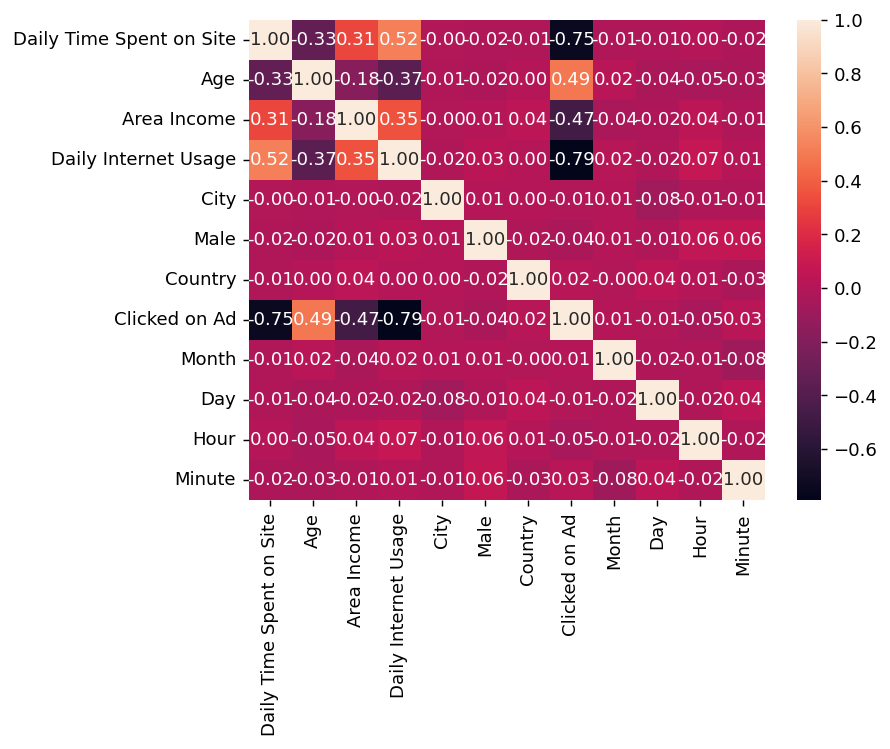

In [13]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [14]:
df.drop(['Daily Time Spent on Site', 'Age', 'Area Income'], axis=1, inplace=True)
df.head()
numeric_df = df.select_dtypes(include=[np.number])

Outcome Proportionality

Outcome Proportion:
Clicked on Ad
0    0.504541
1    0.495459
Name: proportion, dtype: float64


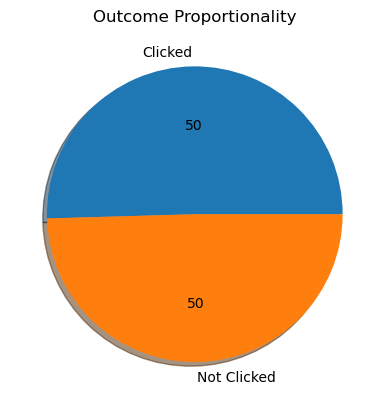

In [15]:
# Check the proportion of outcomes in the target variable
outcome_proportion = df['Clicked on Ad'].value_counts(normalize=True)
print("Outcome Proportion:")
print(outcome_proportion)

plt.pie(numeric_df['Clicked on Ad'].value_counts(), 
		labels= ['Clicked', 'Not Clicked'], 
		autopct='%.f', shadow=True)
plt.title('Outcome Proportionality')
plt.show()


In [16]:

# df.head()


# # X_scaled = scaler.fit_transform(X)
# # df.head()

# # Define the scalers
# scalers = {
#     'Normalization': MinMaxScaler(),
#     'Standardization': StandardScaler()
# }

# for scaler_name, scaler in scalers.items():
#     print(f"Applying {scaler_name}:")

#     # Apply the scaler to the features (excluding one-hot encoded columns)
#     X_scaled = scaler.fit_transform(X)

Normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Exclude the target variable ('Clicked on Ad') from normalization
X = df.drop('Clicked on Ad', axis=1)

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply normalization to the feature columns
X_normalized = min_max_scaler.fit_transform(X)

# Concatenate the normalized features with the target variable
df_normalized = pd.concat([pd.DataFrame(X_normalized, columns=X.columns), df['Clicked on Ad']], axis=1)

Standardization

In [18]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame after label encoding
# Exclude the target variable ('Clicked on Ad') from standardization
# X = df.drop('Clicked on Ad', axis=1)

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Apply standardization to the feature columns
X_standardized = standard_scaler.fit_transform(X)

# Concatenate the standardized features with the target variable
df_standardized = pd.concat([pd.DataFrame(X_standardized, columns=X.columns), df['Clicked on Ad']], axis=1)


Spliting the Dataset

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = df['Clicked on Ad']
# Splitting the dataset

# X_train, X_test, y_train, y_test = train_test_split(X, df['Clicked on Ad'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_standardized, df['Clicked on Ad'], test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_normalized, df['Clicked on Ad'], test_size=0.2, random_state=42)


Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

# Define and train the Logistic Regression model
model_logistic = LogisticRegression(random_state=42)
model_logistic.fit(X_train, y_train)

# Predictions
y_pred_logistic = model_logistic.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))


Accuracy: 0.9246231155778895
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       103
           1       0.93      0.92      0.92        96

    accuracy                           0.92       199
   macro avg       0.92      0.92      0.92       199
weighted avg       0.92      0.92      0.92       199

Confusion Matrix:
[[96  7]
 [ 8 88]]


Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Define and train the Decision Tree model
model_decisionTree = DecisionTreeClassifier(random_state=42)
model_decisionTree.fit(X_train, y_train)

# Predictions
y_pred_decisionTree = model_decisionTree.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_decisionTree))
print("Classification Report:")
print(classification_report(y_test, y_pred_decisionTree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_decisionTree))

Accuracy: 0.8341708542713567
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       103
           1       0.80      0.88      0.84        96

    accuracy                           0.83       199
   macro avg       0.84      0.84      0.83       199
weighted avg       0.84      0.83      0.83       199

Confusion Matrix:
[[82 21]
 [12 84]]


Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

for model_name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # You can adjust the number of folds as needed
    print(f"{model_name} Cross-Validation Scores: {cv_scores}")
    print(f"{model_name} Mean Accuracy: {np.mean(cv_scores)}\n")

Logistic Regression Cross-Validation Scores: [0.87421384 0.93710692 0.89873418 0.87341772 0.89873418]
Logistic Regression Mean Accuracy: 0.8964413661332697

Decision Tree Cross-Validation Scores: [0.82389937 0.86792453 0.86708861 0.80379747 0.8164557 ]
Decision Tree Mean Accuracy: 0.8358331343045936



Post-Processing

Grid Search for Logistic Regression

In [23]:
from sklearn.model_selection import GridSearchCV
# parameters_lr = [{'penalty':['l1', 'l2', 'elasticnet', None],'C': [0, 0.002, 0.004, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055]}]

parameters_lr = [{'penalty':['l1', 'l2', 'elasticnet', None],'C': [0, 0.003, 0.006, 0.009, 0.012, 0.015, 0.018, 0.021, 0.024, 0.027, 0.030]}]

# parameters_lr = [{'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search_lr = GridSearchCV(estimator = model_logistic,
                           param_grid = parameters_lr,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
# grid_search_lr = GridSearchCV(estimator = model_logistic,
#                            param_grid = parameters_lr,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)

grid_search_lr.fit(X_train, y_train)
best_accuracy_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_  
print("Best Accuracy of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

Best Accuracy of LR: 90.65 %
Best Parameter of LR: {'C': 0.015, 'penalty': 'l2'}


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils

Grid Search for Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
parameters_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search_dt = GridSearchCV(model_decisionTree, parameters_dt, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV to your training data
grid_search_dt.fit(X_train, y_train)

# Get the best model from the grid search
best_dt_model = grid_search_dt.best_estimator_

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_dt)

# Get the best accuracy from cross-validation
best_accuracy_dt = grid_search_dt.best_score_
print("Best Accuracy of Decision Tree: {:.2f} %".format(best_accuracy_dt * 100))


Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy of Decision Tree: 85.61 %
